### Loads dataset in training format
* input volume -> NHWC
* output volume -> NHWC

In [19]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import helpers as H

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

# Dataset directories
LOW_DIR = "singlecoil_train_3D_images_48x/low/"
HIGH_DIR = "singlecoil_train_3D_images_48x/high/"

LOW_DIR_PATH = os.path.join(TRAIN_DATASET_PATH, LOW_DIR)
HIGH_DIR_PATH = os.path.join(TRAIN_DATASET_PATH, HIGH_DIR)
LOW_DIR_PATH, HIGH_DIR_PATH

('/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low/',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high/')

In [20]:
w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    print(img.shape[-1])
    print(type(img.shape[-1]))
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img


def change_depth(img):

    img_start = img[:,:,:4]
    
    mid = int(img.shape[-1]/2)
    img_middle = img[:,:,mid-10:mid+10]
    
    img_end = img[:,:,-4:]
    img = np.concatenate((img_start, img_middle, img_end), axis=2)
    return img


def show_slices(data, slice_nums, cmap=None):
    data = np.moveaxis(data, 2, 0)
    fig = plt.figure(figsize=(16, 16))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)        

#### Check number of contents

In [21]:
len(os.listdir(LOW_DIR_PATH)), len(os.listdir(HIGH_DIR_PATH))

(8, 8)

In [22]:
low_full_paths = ["{}/{}".format(LOW_DIR_PATH,l) for l in H.sort_paths(os.listdir(LOW_DIR_PATH))]
high_full_paths = ["{}/{}".format(HIGH_DIR_PATH,h) for h in H.sort_paths(os.listdir(HIGH_DIR_PATH))]

In [25]:
low_full_paths[:4]

['/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low//1.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low//2.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low//3.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low//4.npy']

In [26]:
high_full_paths[:4]

['/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high//1.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high//2.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high//3.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high//4.npy']

#### LOW MRI VOLUMES

In [30]:
x_train = []
c=0

for l in low_full_paths:
    x = np.load("{}".format(l))
    x = np.moveaxis(x, 0, 2)
    x = change_depth(x)
    
    x_train.append(x)
    c+=1
    #print(c, "----", l, x.shape)
    
    
x_train = np.array(x_train)
x_train.shape

(8, 320, 320, 28)

#### HIGH MRI VOLUMES

In [31]:
y_train = []
c=0

for h in high_full_paths:
    y = np.load("{}".format(h))
    y = np.moveaxis(y, 0, 2)
    y = change_depth(y)
    
    y_train.append(y)
    c+=1
    #print(c, "----", h, y.shape)
    
    
y_train = np.array(y_train)
y_train.shape

(8, 320, 320, 28)

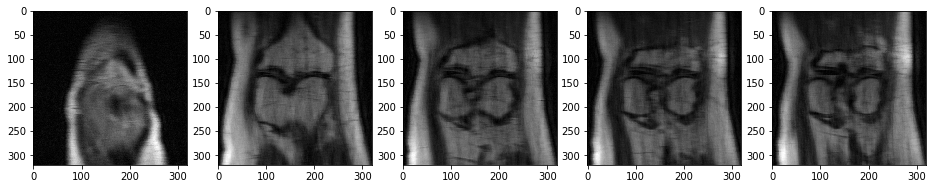

In [34]:
slice_num = [5, 16, 18, 19, 20]
n = 5
show_slices(x_train[n], slice_num, cmap='gray')

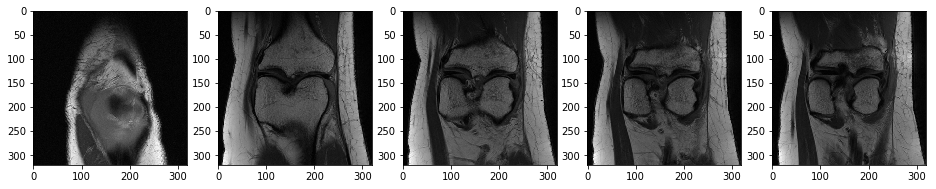

In [36]:
show_slices(y_train[n], slice_num, cmap='gray')

In [17]:
print("Done!")

Done!
